# Project: Investigate a Dataset (Appointment Show up in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project aims to analyse data related to medical appointments made by people living in Brazil. This project uses patients' variables or features to predict whether patients will show up for their scheduled appointment. The given data has 110527 entries and 14 features. I would first of all access and explore the data before cleaning the data since understanding the data helps to know what questions to ask or which questions needs to be address. Some of the questions to consider for this prediction are\
> Which gender shows up more and does gender influence or affect showing up for a medical appointment?\
> Which age class shows up more and does the age affect the show-up?\
> Do people who receive sms messages show up?\
> Does the neighbourhood a patient live in effect show up? \
> Does the day of the week the appointment was made influence show up?\



In [3]:
#importing important libraries for my data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)


<a id='wrangling'></a>
## Data Wrangling
Access, explore and clean data by dropping irrelevant columns, remove duplicates and change datatype of AppointmentDay column. 

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
medical_records=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#   types and look for instances of missing or possibly errant data.
medical_records.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#Check the data types of my features
medical_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#renaming the No-Show column to make it convenient for access
medical_records=medical_records.rename(columns={'No-show':'No_show'})

In [94]:
#Remove the time included in the date since it was the same and redundant
medical_records['AppointmentDay']=pd.to_datetime(medical_records['AppointmentDay']).dt.date
medical_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#Use pd.to_datetime to convert the date from object to datetime data type
medical_records['AppointmentDay']=pd.to_datetime(medical_records['AppointmentDay'])
medical_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  object             
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

In [9]:
#Determining the number of people in the data and number of info about each person
medical_records.shape


(110527, 14)

In [10]:
#Checking for missing values
medical_records.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
dtype: int64

In [14]:
#Deleting column that are not useful for my analysis
medical_records.drop(columns=['PatientId', 'AppointmentID','ScheduledDay'], axis=1, inplace= True)


In [15]:
medical_records.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
#Check for dupi
medical_records.duplicated().sum()


15375

In [102]:
#Drop all the duplicates since it is redundant
medical_records=medical_records.drop_duplicates()

In [103]:
#Checking to see if duplicated have been dropped
medical_records.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95152 entries, 0 to 110525
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gender          95152 non-null  object        
 1   AppointmentDay  95152 non-null  datetime64[ns]
 2   Age             95152 non-null  int64         
 3   Neighbourhood   95152 non-null  object        
 4   Scholarship     95152 non-null  int64         
 5   Hipertension    95152 non-null  int64         
 6   Diabetes        95152 non-null  int64         
 7   Alcoholism      95152 non-null  int64         
 8   Handcap         95152 non-null  int64         
 9   SMS_received    95152 non-null  int64         
 10  No_show         95152 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 8.7+ MB


In [104]:
#Get Statistics description of the data
medical_records.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,95152.000000,95152.000000,95152.000000,95152.000000,95152.000000,95152.000000,95152.000000
mean,37.949723,0.105936,0.215119,0.079410,0.030677,0.024098,0.344197
std,23.058085,0.307757,0.410907,0.270379,0.172443,0.167944,0.475108
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [105]:
#Delete rows with age = -1 since a person cannot be -1 years old
medical_records = medical_records[medical_records.Age != -1]

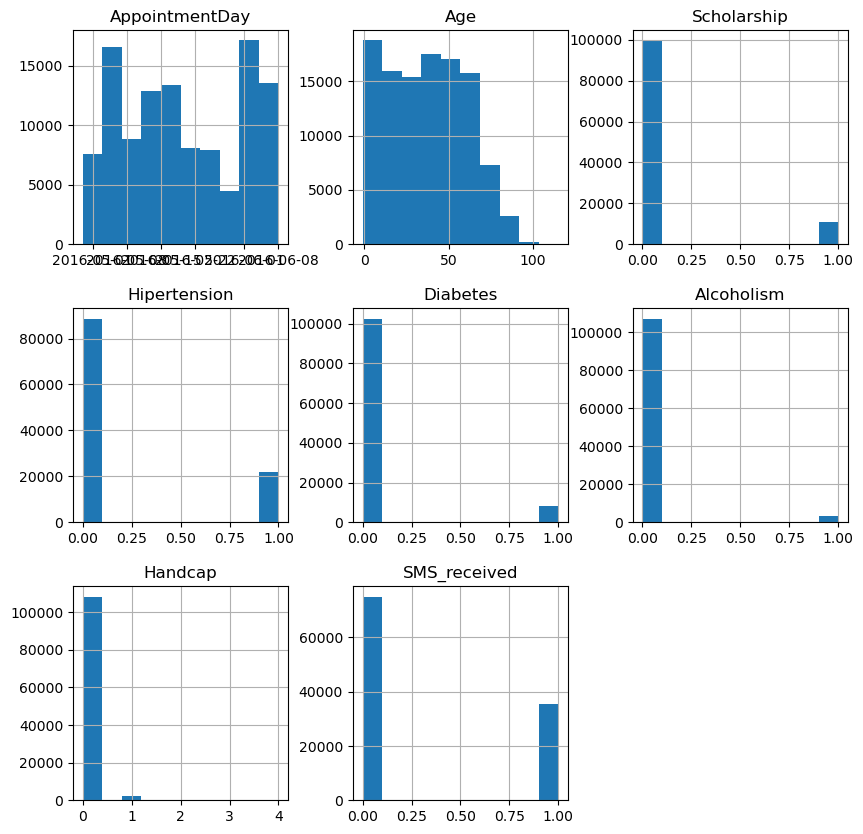

In [18]:
#medical_records.info()
#Histogram figure of the data features
medical_records.hist(figsize=(10,10));

<a id='eda'></a>
## Exploratory Data Analysis

Computing statistics and creating visualizations with the goal of addressing the research questions asked in the introduction section.

In [32]:
#Labelled 'No' in the show up column as Show_up and 'Yes' in the show up column as No_Show_up.
show_up=medical_records.No_show == 'No'
No_show_up=medical_records.No_show == 'Yes'

In [35]:
#Count of people who showed up(N0) and people who did not show up(Yes)
medical_records.No_show.value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

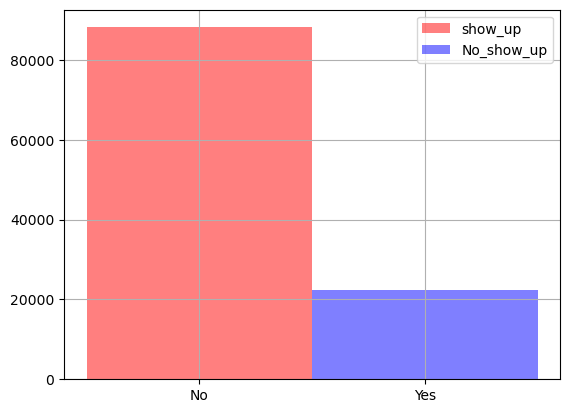

In [40]:
#Histogram plot for patients who showed up and patients who did not show up
medical_records.No_show[show_up].hist(alpha=0.5, bins=1, color='red' ,label='show_up')
medical_records.No_show[No_show_up].hist(alpha=0.5, bins=1, color='blue', label='No_show_up')
plt.legend();

It appears 74458 patients showed up for their scheduled appointment out of 95152 patients being investigated

### Research Question 1 (Does the day of the week appointment was scheduled for influence  show up?)

In [43]:
#Creating a column for day of the week
medical_records['day_of_week'] = medical_records['AppointmentDay'].dt.dayofweek

In [44]:
medical_records.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,day_of_week
0,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4
1,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4
2,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,4
3,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4
4,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4


In [112]:
#Finding number of unique days of the week
medical_records.day_of_week.nunique()

6

In [45]:
#Counting the number of patient who showed up or did not show up based on day of the week
Show_day_counts=medical_records.groupby('No_show')['day_of_week'].value_counts(sort=False)
Show_day_counts

No_show  day_of_week
No       0              18025
         1              20488
         2              20774
         3              13909
         4              14982
         5                 30
Yes      0               4690
         1               5152
         2               5093
         3               3338
         4               4037
         5                  9
Name: day_of_week, dtype: int64

Text(0, 0.5, 'Number Show up / No show')

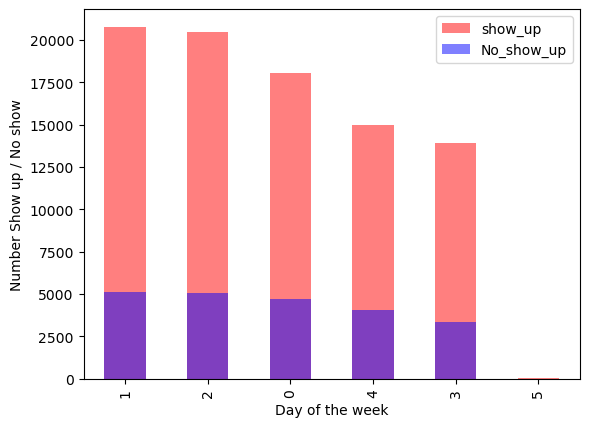

In [46]:
#plot of Day of the week received against Show up
medical_records.day_of_week[show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='show_up')
medical_records.day_of_week[No_show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='No_show_up')
plt.legend();
plt.xlabel('Day of the week')
plt.ylabel('Number Show up / No show')

From the visualization above, it appears most appointments are scheduled for Tuesday and Wednesday

### Conclusion on Day of the week
From analysis, it appears patients are more likely to show up for scheduled appointment on Tuesday , Wednesday and Thursday since the show higher proportion on those days as compared to Monday and Friday. There are less appointments made on Saturday. This may be due to the fact that the facility is do not open or does not take a lot of appointments on weekends.

### Research Question 2 (Does receiving SMS before scheduled appointment affect show up?)

In [125]:
#Total number of patients who showed up irrespective of whether they received SMS or not
medical_records.SMS_received[show_up].value_counts().sum()

74458

In [126]:
#Patients who shown up with or without receiving SMS
medical_records.SMS_received[show_up].value_counts()

0    51059
1    23399
Name: SMS_received, dtype: int64

In [127]:
#Sum of Patients who do not show up with or without receiving SMS
medical_records.SMS_received[No_show_up].value_counts().sum()

20693

In [128]:
#Patients who do not show up with or without receiving SMS
medical_records.SMS_received[No_show_up].value_counts()

0    11341
1     9352
Name: SMS_received, dtype: int64

Text(0, 0.5, 'Number Show up / No show')

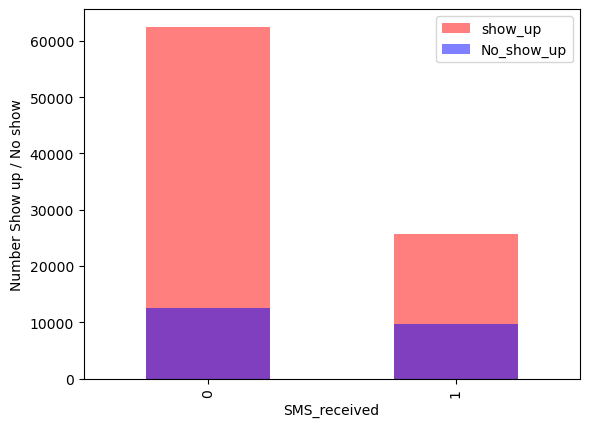

In [51]:
#plot of SMS received of not against Show up and No show up
medical_records.SMS_received[show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='show_up')
medical_records.SMS_received[No_show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='No_show_up')
plt.legend();
plt.xlabel('SMS_received')
plt.ylabel('Number Show up / No show')

It appears, majority of patients did not receive SMS as a reminder before their appointment. This may be due to the facility not having their contact numbers or the patients not having phones etc.

In [53]:
#Counting No show and sms received
Show_SMS_counts=medical_records.groupby(['No_show','SMS_received']).count()['Age']
Show_SMS_counts

No_show  SMS_received
No       0               62510
         1               25698
Yes      0               12535
         1                9784
Name: Age, dtype: int64

### Conclusion on SMS received
From analysis, it appears patients who show up for their appointment more do not even received an SMS before the scheduled appointment.\
On the other hand, patients who receive SMS before their scheduled appointment show up less. Therefore receiving SMS before appointment does not guarentee show up.


### Research Question 4 (Does the Age class of a person influence showing up for appointment?)


In [56]:
#finding the mean age of people who show up or does not show up for their appointment
medical_records.groupby('No_show')['Age'].mean()

No_show
No     37.790064
Yes    34.317667
Name: Age, dtype: float64

Text(0, 0.5, 'Age')

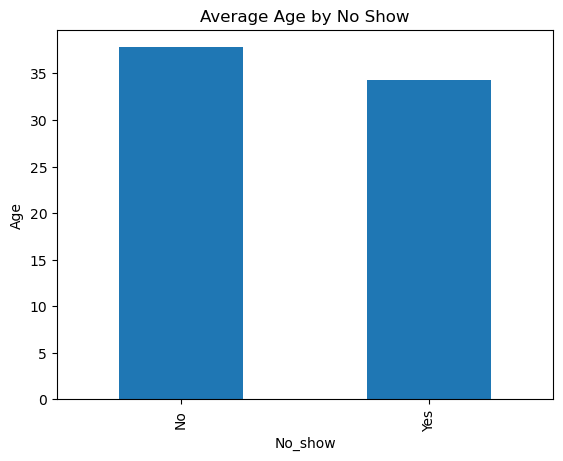

In [57]:
#Plot of average age of people who show up or does not show up for their appointment
medical_records.groupby('No_show')['Age'].mean().plot(kind='bar', title='Average Age by No Show')
plt.xlabel('No_show')
plt.ylabel('Age')

It appears the average age of patients who show up for scheduled appointment is approximately 38 and the average age of patients who does not shows up for scheduled appointment is approximately 34. 

Text(0, 0.5, 'Number Show up / No show')

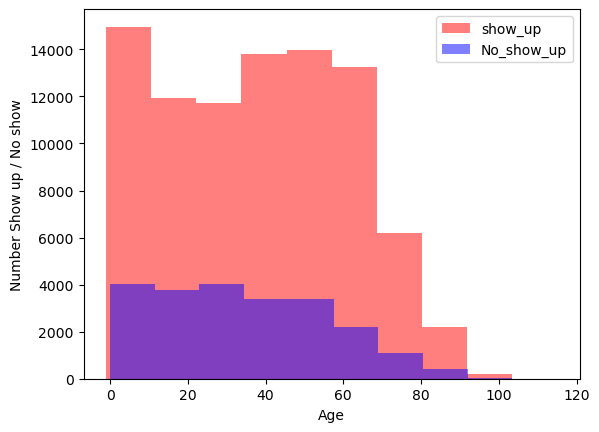

In [58]:
#Histogram plot of Age against Show up or no show up
medical_records.Age[show_up].plot(kind='hist',alpha=0.5, bins=10,color='red', label='show_up')
medical_records.Age[No_show_up].plot(kind='hist',alpha=0.5, bins=10, color='blue', label='No_show_up')
plt.legend();
plt.xlabel('Age')
plt.ylabel('Number Show up / No show')

In [59]:
#Statistical description of Age to help create bins
medical_records.describe().Age

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [64]:
# Create Bin edges to "cut" the age data into groups('Child','Teenage','Adult','Senior Adult')
bin_edges = [ 0,12 ,19 , 59, 115] 
bin_names=['Child','Teenage','Adult','Senior Adult']
medical_records['Age_class']=pd.cut(medical_records['Age'],bin_edges,labels=bin_names)
medical_records.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,day_of_week,Age_class
0,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,Senior Adult
1,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,Adult
2,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,Senior Adult
3,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,Child
4,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,Adult


In [65]:
#getting the count of the age classes in the dataset
medical_records['Age_class'].value_counts()
#medical_records.groupby(['Age_class']).count()

Adult           58942
Senior Adult    21173
Child           17497
Teenage          9375
Name: Age_class, dtype: int64

In [66]:
#Count of No show and age class
medical_records.groupby('No_show')['Age_class'].value_counts(sort=False)

No_show              
No       Child           13829
         Teenage          6941
         Adult           46606
         Senior Adult    17931
Yes      Child            3668
         Teenage          2434
         Adult           12336
         Senior Adult     3242
Name: Age_class, dtype: int64

In [67]:
Show_Age_counts=medical_records.groupby(['No_show','Age_class']).count()['Age']
Show_Age_counts

No_show  Age_class   
No       Child           13829
         Teenage          6941
         Adult           46606
         Senior Adult    17931
Yes      Child            3668
         Teenage          2434
         Adult           12336
         Senior Adult     3242
Name: Age, dtype: int64

Text(0, 0.5, 'Number Show up / No show')

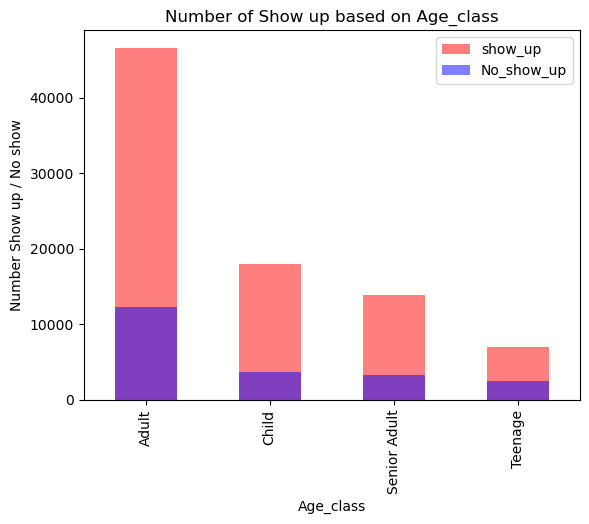

In [68]:
#Plot of Age class against show up
medical_records.Age_class[show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='show_up', title='Number of Show up based on Age_class')
medical_records.Age_class[No_show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='No_show_up')
plt.legend();
plt.xlabel('Age_class')
plt.ylabel('Number Show up / No show')

The are more adults patients than other age group considering the visualisation above. 

### Conclusion on Age
In my analysis, given the ratio of showing up and not showing up for appointment for a Senior Adult, it appears Senior Adults are more likely to show up for scheduled appointment. Teenage and Adult patients are less likely to show up for a scheduled appointment. Children, on the other hand are almost just as likely to show up as they are unlikely to show up for a scheduled appointment.

### Research Question 5 (Does the Gender of a person influence Showing up for appointment?)

In [78]:
#Count of each gender
medical_records.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [79]:
#COunt of Gender based on No Show
medical_records.groupby('Gender')['No_show'].value_counts()

Gender  No_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

Text(0, 0.5, 'Number Show up / No show')

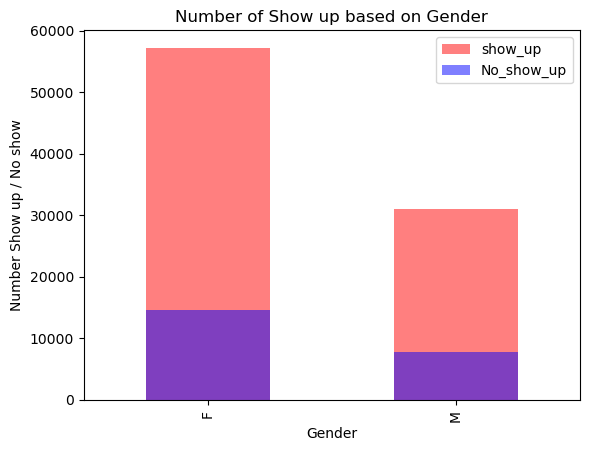

In [81]:
#plot of Number of Show up or No show up against Gender
medical_records.Gender[show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='show_up', title='Number of Show up based on Gender')
medical_records.Gender[No_show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='No_show_up')
plt.legend();
plt.xlabel('Gender')
plt.ylabel('Number Show up / No show')

Clearly, there are more female than the male gender showing up or not showing up for appointments

### Conclusion on Gender
Considering the above visualization, gender is not a strong variable to determine if a patient will show up for an appointment or not since the proportion of both male and female for showing up for appointment is almost 50:50.

### Research Question 6 (Does the Neigbourhood a person lives in influence Showing up for appointment?)

In [82]:
#number of unique neighbourhood
medical_records.Neighbourhood.nunique()

81

In [88]:
#Count of patients who showed up or does not show up based on Neighbourhood
medical_records.groupby('Neighbourhood').count()['No_show']

Neighbourhood
AEROPORTO                 8
ANDORINHAS             2262
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
                       ... 
SÃO JOSÉ               1977
SÃO PEDRO              2448
TABUAZEIRO             3132
UNIVERSITÁRIO           152
VILA RUBIM              851
Name: No_show, Length: 81, dtype: int64

In [91]:
#Count of patients who does not show up based on Neighbourhood
medical_records.Neighbourhood[show_up].value_counts()

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

In [93]:
#Count of patients who does not show up based on Neighbourhood
medical_records.Neighbourhood[No_show_up].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

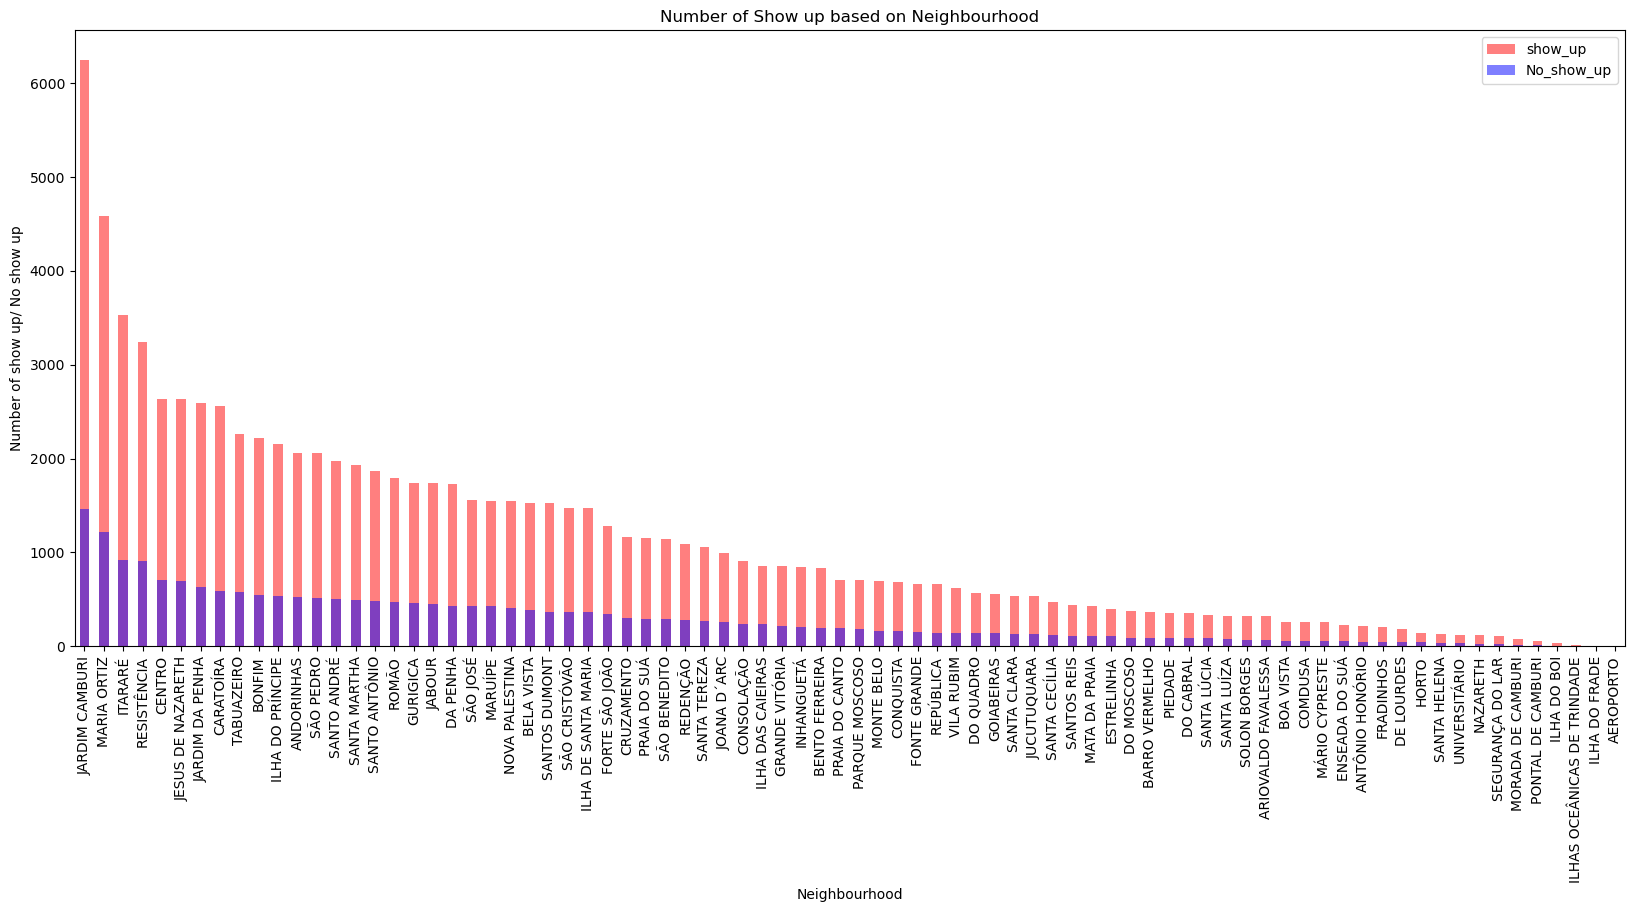

In [94]:
#Bar chart of Show up/No show up based on Neigbourhood count
plt.figure(figsize=(20,8))
medical_records.Neighbourhood[show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='show_up',title='Number of Show up based on Neighbourhood')
medical_records.Neighbourhood[No_show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='No_show_up')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of show up/ No show up')
plt.legend();

The bar chart represents the neighbourhood that has the most patients scheduling appointment. Each bar consist of number patients who showed up and patients who did not show up based on the neighbourhood they live in. 

### Conclusion on Neighbourhood
Given the visualization, From observation, it appears patients from JARDIM CAMBURI and MARIA ORTIZ neighbourhood happen to show up more for appointments as compared to patients from MARUÍPE. Therefore, the Neigbourhood a patients lives in greatly affects whether or not a patients shows up for a scheduled appointment since the location of the closer the facility is to a neigbourhood, the more probable it is for a patient to show up. Transportation availability and cost of transportation from a patients neighbourhood to the facility is another factor which may affect show up for appointment.

<a id='conclusions'></a>
## Conclusions


In summary, out of 95,152 patients under investigation, 74,458 attended their scheduled medical appointments, while 20,693 did not. Analyzing the impact of the day of the week on appointment attendance revealed that most appointments are scheduled on Tuesdays and Wednesdays, with Saturday having the lowest appointment count. Tuesday, Wednesday, and Thursday exhibit a higher proportion of patients showing up compared to those not showing up, indicating a higher likelihood of attendance on these days.

Exploring the effect of SMS notification reminders on attendance, it was observed that a majority of patients who did not receive reminders still showed up, challenging the notion that SMS reminders guarantee attendance.

Considering age groups, Senior Adults are more likely to show up for scheduled appointments, while Teenagers and Adults are less likely to attend. Gender, as an independent variable, does not strongly determine appointment attendance.

Geographically, the neighborhood of JARDIM CAMBURI has the highest number of scheduled appointments, with transportation factors influencing attendance. Patients from JARDIM CAMBURI and MARIA ORTIZ tend to show up more compared to those from MARUÍPE. In conclusion, various factors, including the day of the week, SMS reminders, age, gender, and neighborhood, contribute to the likelihood of patients showing up for their scheduled medical appointments.